# exploring data 

In [834]:
import os

In [835]:
len(os.listdir('COVID-19_Radiography_Dataset/COVID/images'))

3616

In [836]:
len(os.listdir('COVID-19_Radiography_Dataset/Normal/images'))

10192

In [837]:
import cv2

In [838]:
img = cv2.imread('COVID-19_Radiography_Dataset/Normal/images/Normal-10005.png')

In [839]:
import matplotlib.pyplot as plt

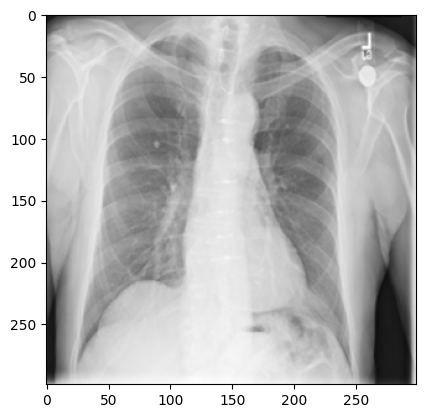

In [840]:
plt.imshow(img)

In [841]:
img.shape

(299, 299, 3)

In [842]:
import numpy as np

In [843]:
urls = os.listdir('COVID-19_Radiography_Dataset/COVID/images')

In [844]:
path = "COVID-19_Radiography_Dataset/COVID/images/" + urls[0]

In [845]:
path

'COVID-19_Radiography_Dataset/COVID/images/COVID-1.png'

# preparing Dataset

In [846]:
def loadImages(path, urls, target):
  images = []
  labels = []
  for i in range(3616):
    img_path = path + "/" + urls[i]
    img = cv2.imread(img_path)
    img = img / 255.0
    img = cv2.resize(img,(100, 100))
    images.append(img)
    labels.append(target)
  images = np.asarray(images)
  return images, labels

In [847]:
covid_path = "COVID-19_Radiography_Dataset/COVID/images"
covidUrl = os.listdir(covid_path)
covidImages, covidTargets = loadImages(covid_path, covidUrl, 1)
print(len(covidImages))

3616


In [848]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# datagen = ImageDataGenerator(
#     zoom_range=0.2,            # Zoom images by up to 20%
#     horizontal_flip=True,      # Randomly flip images horizontally
#     fill_mode='nearest'        # Fill any newly created pixels after a transform
# )

# # Fit the generator to your training data
# datagen.fit(covidImages)

In [849]:
len(ci)


0

In [850]:
len(covidUrl), len(covidImages)

(3616, 3616)

In [851]:
normal_path = "COVID-19_Radiography_Dataset/Normal/images"
normal_urls = os.listdir(normal_path)
normalImages, normalTargets = loadImages(normal_path, normal_urls, 0)
print(len(normalImages))

3616


In [852]:
covidImages.shape

(3616, 100, 100, 3)

In [853]:
normalImages.shape

(3616, 100, 100, 3)

In [854]:
data = np.r_[covidImages, normalImages]

In [855]:
data.shape

(7232, 100, 100, 3)

In [856]:
targets = np.r_[covidTargets, normalTargets]

In [857]:
targets.shape

(7232,)

# splittin the data

In [858]:
from sklearn.model_selection import train_test_split

In [859]:
x_train, x_test, y_train, y_test = train_test_split(data, targets, test_size=0.20,random_state=0)

# creating the model

In [860]:
import tensorflow 

In [861]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense ,Input

In [862]:
inputshape=(100,100,3)

In [863]:
model = Sequential([
    Input(shape=inputshape),
    Conv2D(32, 3,  activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [864]:
model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_51 (Conv2D)                   │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_51 (MaxPooling2D)      │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_52 (Conv2D)                   │ (None, 47, 47, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_52 (MaxPooling2D)      │ (None, 23, 23, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_53 (Conv2D)                   │ (None, 21, 21, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_53 (MaxPooling2D)      │ (None, 10, 10, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_17 (Flatten)                 │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 512)                 │         819,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 959,137 (3.66 MB)

 Trainable params: 959,137 (3.66 MB)

 Non-trainable params: 0 (0.00 B)

In [865]:
model.compile(optimizer='Nadam', loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [866]:
model.fit(x_train, y_train,batch_size=32,epochs=5,validation_data=(x_test, y_test))

Epoch 1/5
181/181 ━━━━━━━━━━━━━━━━━━━━ 13s 48ms/step - accuracy: 0.6646 - loss: 0.5679 - val_accuracy: 0.8749 - val_loss: 0.3064
Epoch 2/5
181/181 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.8681 - loss: 0.3228 - val_accuracy: 0.8846 - val_loss: 0.2876
Epoch 3/5
181/181 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.8991 - loss: 0.2454 - val_accuracy: 0.9005 - val_loss: 0.2422
Epoch 4/5
181/181 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - accuracy: 0.9165 - loss: 0.2034 - val_accuracy: 0.9067 - val_loss: 0.2300
Epoch 5/5
181/181 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.9379 - loss: 0.1644 - val_accuracy: 0.9046 - val_loss: 0.2329


# accuracy

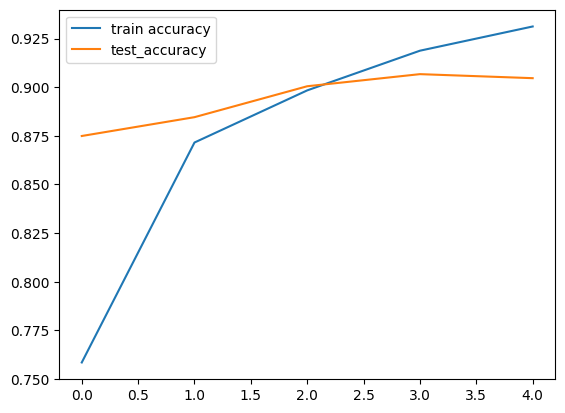

In [867]:
plt.plot(model.history.history['accuracy'], label = 'train accuracy')
plt.plot(model.history.history['val_accuracy'],label = 'test_accuracy')
plt.legend()
plt.show()

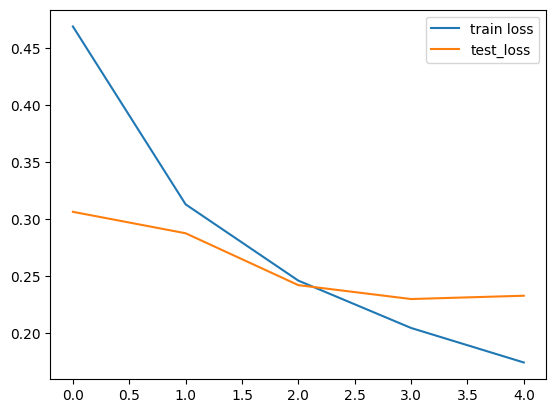

In [868]:
plt.plot(model.history.history['loss'], label = 'train loss')
plt.plot(model.history.history['val_loss'],label = 'test_loss')
plt.legend()
plt.show()

In [869]:
model.evaluate(x_test,y_test)

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9089 - loss: 0.2132


[0.23292236030101776, 0.9046302437782288]

In [870]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [871]:
y_test

array([0, 0, 1, ..., 0, 0, 1])

In [872]:
y_pred = model.predict(x_test)
  

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


In [873]:
for i in range(len(y_pred)):
    y_pred[i] =1 if y_pred[i] > 0.5 else 0

In [874]:
y_pred

array([[0.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [875]:
accuracy_score(y_pred,y_test)

0.9046302695231514

In [876]:
confusion_matrix(y_pred,y_test)

array([[699, 100],
       [ 38, 610]], dtype=int64)

In [877]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [878]:
def checker(imgUrl):
    target_size = (100, 100,3)
    img=load_img(imgUrl,target_size=target_size)
    img_array = img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    predictions = model.predict(img_array)
    predicted_class = 1 if predictions[0] > 0.5 else 0
    if predicted_class==1:
        print(f'your result is {predicted_class} which means you have corona')
    else:
        print(f'your result is {predicted_class} which means you are fine')




In [879]:
img_path='COVID-19_Radiography_Dataset/Normal/images/Normal-10005.png'
checker(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
your result is 0 which means you are fine


In [880]:
img_path2='COVID-19_Radiography_Dataset/COVID/images/COVID-1.png'
checker(img_path2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
your result is 1 which means you have corona


In [881]:
model.save('CoronaModel.keras')